## Load the data first:

In [4]:
# Imports 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# First look

print(train.shape)
print(train.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

### Initial Observations
- 1460 houses in training data
- 81 columns (80 features + 1 target)
- Target is SalePrice (last column)
- Mix of numerical and text features

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


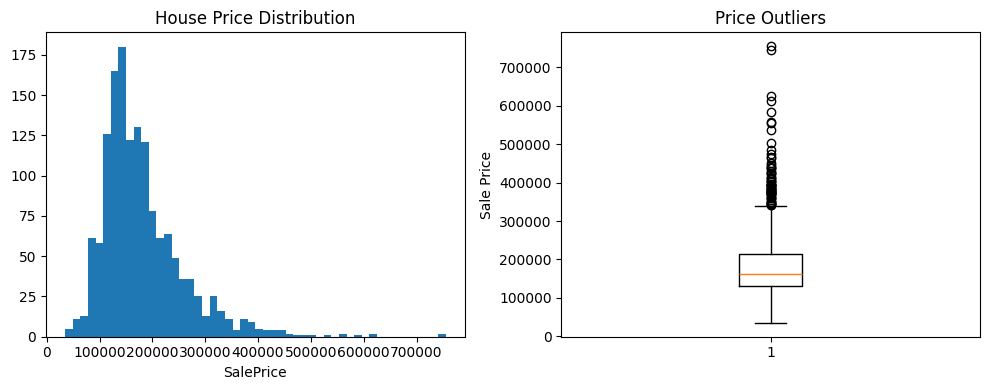

In [ ]:
# What are we predicting?
print(train['SalePrice'].describe())

# Plot it
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
# subplot(n_rows, n_cols, index)

plt.hist(train['SalePrice'], bins=50)
plt.xlabel ('SalePrice')
plt.title('House Price Distribution')

plt.subplot(1,2,2)
# subplot(n_rows, n_cols, index)

plt.boxplot(train['SalePrice'])
plt.ylabel('Sale Price')
plt.title('Price Outliers')

plt.tight_layout()
plt.show()


### Target Variable (SalePrice)
- Range: $34,900 to $755,000
- Median: ~$163,000
- Distribution is RIGHT-SKEWED (long tail on expensive side)
- Several outliers above $600k
- **Action item:** Might need to log-transform this for modeling

## Check missing values:

Columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


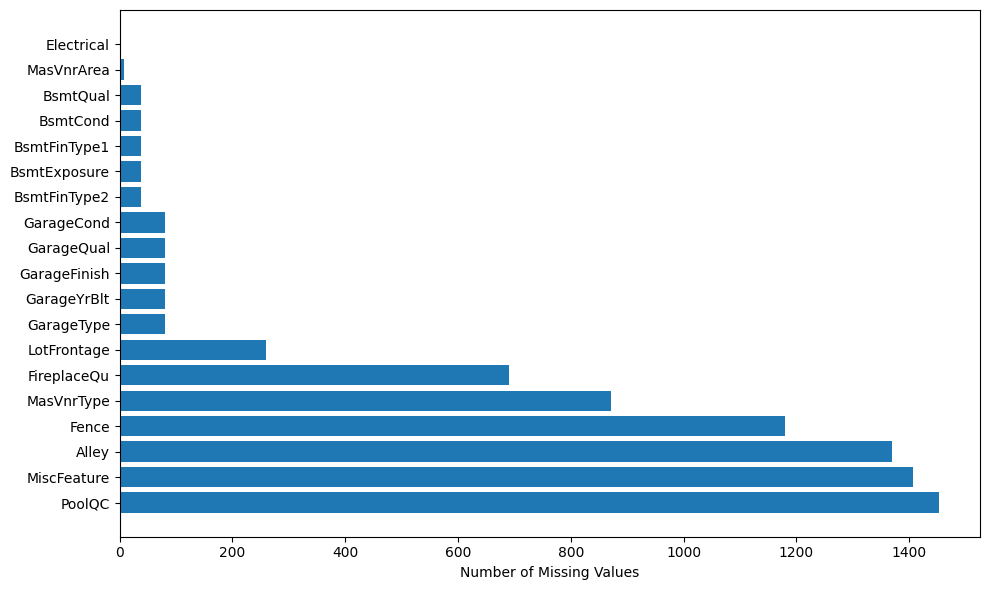

In [12]:
# Which columns have missing data?
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Columns with missing values:")
print(missing)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(missing.index, missing.values)
plt.xlabel('Number of Missing Values')
plt.tight_layout()
plt.show()

### Missing Values
- PoolQC: 1453/1460 missing (99%!) - Most houses don't have pools
- MiscFeature: 1406/1460 missing - Similar reason
- Alley: 1369/1460 missing - Most houses don't have alley access
- Fence: 1179/1460 missing

**Strategy:**
- High missing (>80%): Maybe drop these columns
- Medium missing (20-80%): Impute or create "missing" category
- Low missing (<20%): Simple imputation (mean/median/mode)

## Find important features:

In [ ]:
# Which features correlate with price?

